In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import tensorflow as tf
import pathlib
import PIL
import time
import zipfile
import random
from tensorflow import keras as ks
from tensorflow.keras.layers import *
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from fastai.vision.all import *

In [2]:
test_df=pd.read_csv("../input/microsoft-rice-disease-classification-challenge/Test (8).csv")

In [3]:
train_df=pd.read_csv("../input/microsoft-rice-disease-classification-challenge/Train (6).csv")

sub=pd.read_csv("../input/microsoft-rice-disease-classification-challenge/SampleSubmission (4).csv")

In [4]:
test_df

,Image_id
0,id_00vl5wvxq3.jpg
1,id_00vl5wvxq3_rgn.jpg
2,id_01hu05mtch.jpg
3,id_01hu05mtch_rgn.jpg
4,id_030ln10ewn.jpg
...,...
2285,id_ztvp2l9k3h_rgn.jpg
2286,id_zwwcma7hlt.jpg
2287,id_zwwcma7hlt_rgn.jpg
2288,id_zyo7m4fj8h.jpg


In [5]:
train_df

,Image_id,Label
0,id_004wknd7qd.jpg,blast
1,id_004wknd7qd_rgn.jpg,blast
2,id_005sitfgr2.jpg,brown
3,id_005sitfgr2_rgn.jpg,brown
4,id_00stp9t6m6.jpg,blast
...,...,...
5335,id_zz6gzk7p97_rgn.jpg,brown
5336,id_zz8ca2p67e.jpg,blast
5337,id_zz8ca2p67e_rgn.jpg,blast
5338,id_zzt8y9q0x0.jpg,brown


In [6]:
Id=test_df["Image_id"]

In [7]:
train_df.Label.unique()

array(['blast', 'brown', 'healthy'], dtype=object)

In [8]:
train_df.Label.value_counts()

blast      2988
brown      1532
healthy     820
Name: Label, dtype: int64

In [9]:
for i in range(1,train_df.shape[0],2):
    train_df.drop(i,inplace=True)
    

In [10]:
train_df = train_df.reset_index(drop=True)

In [11]:
train_df

,Image_id,Label
0,id_004wknd7qd.jpg,blast
1,id_005sitfgr2.jpg,brown
2,id_00stp9t6m6.jpg,blast
3,id_012zxewnhx.jpg,blast
4,id_0186qwq2at.jpg,healthy
...,...,...
2665,id_zydzdp046u.jpg,healthy
2666,id_zyoowbqcm3.jpg,healthy
2667,id_zz6gzk7p97.jpg,brown
2668,id_zz8ca2p67e.jpg,blast


In [12]:
path='../input/microsoft-rice-disease-classification-challenge/Images (1)/'
img_paths = []
for i in train_df.Image_id:
    img_paths.append(path + i)
train_df['path'] = img_paths

In [13]:
train_df

,Image_id,Label,path
0,id_004wknd7qd.jpg,blast,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_004wknd7qd.jpg
1,id_005sitfgr2.jpg,brown,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_005sitfgr2.jpg
2,id_00stp9t6m6.jpg,blast,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_00stp9t6m6.jpg
3,id_012zxewnhx.jpg,blast,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_012zxewnhx.jpg
4,id_0186qwq2at.jpg,healthy,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_0186qwq2at.jpg
...,...,...,...
2665,id_zydzdp046u.jpg,healthy,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_zydzdp046u.jpg
2666,id_zyoowbqcm3.jpg,healthy,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_zyoowbqcm3.jpg
2667,id_zz6gzk7p97.jpg,brown,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_zz6gzk7p97.jpg
2668,id_zz8ca2p67e.jpg,blast,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_zz8ca2p67e.jpg


In [14]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()

train_df= pd.get_dummies(train_df, columns = ["Label"])

In [15]:
train_df

,Image_id,path,Label_blast,Label_brown,Label_healthy
0,id_004wknd7qd.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_004wknd7qd.jpg,1,0,0
1,id_005sitfgr2.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_005sitfgr2.jpg,0,1,0
2,id_00stp9t6m6.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_00stp9t6m6.jpg,1,0,0
3,id_012zxewnhx.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_012zxewnhx.jpg,1,0,0
4,id_0186qwq2at.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_0186qwq2at.jpg,0,0,1
...,...,...,...,...,...
2665,id_zydzdp046u.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_zydzdp046u.jpg,0,0,1
2666,id_zyoowbqcm3.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_zyoowbqcm3.jpg,0,0,1
2667,id_zz6gzk7p97.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_zz6gzk7p97.jpg,0,1,0
2668,id_zz8ca2p67e.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_zz8ca2p67e.jpg,1,0,0


In [16]:
train_datagenerator = ImageDataGenerator(
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest',
    validation_split=0.1)

In [17]:
train_generator = train_datagenerator.flow_from_dataframe(
    train_df, 
    x_col='path', 
    y_col=['Label_blast',"Label_brown","Label_healthy"],
    target_size=(224, 224), 
    color_mode='rgb', 
    class_mode='raw', 
    batch_size=32, 
    shuffle=True, 
    seed=1,
    subset='training')
validation_generator = train_datagenerator.flow_from_dataframe(
    train_df , 
    x_col='path',
    y_col=['Label_blast',"Label_brown","Label_healthy"],
    target_size=(224, 224),
    color_mode='rgb', 
    class_mode='raw', 
    batch_size=4, 
    shuffle=True,
    seed=1, 
    subset='validation')

Found 2403 validated image filenames.
Found 267 validated image filenames.


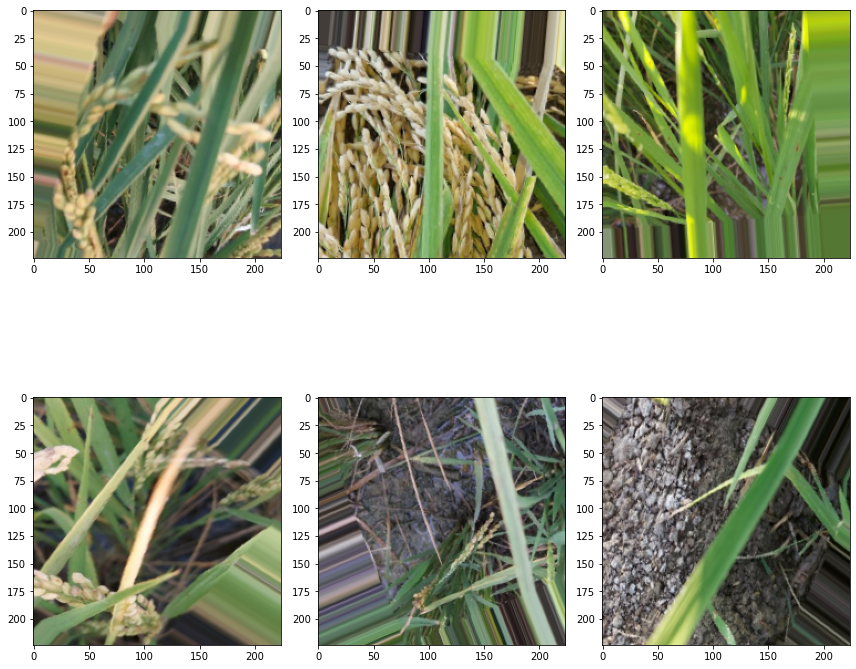

In [18]:
plt.figure(figsize=(12, 12))
for i in range(0, 6):
    plt.subplot(2, 3, i+1)
    for X_batch, Y_batch in validation_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [19]:
train_df=train_df.drop("Image_id", axis=1, inplace=True)

****

In [22]:
import tensorflow_addons as tfa
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten

from tensorflow.keras.applications.resnet50 import ResNet50

model = ResNet50(include_top=False, input_shape=(224, 224, 3))
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
class2 = Dense(512, activation='relu')(class1)
class3 = Dense(256, activation='relu')(class2)
output = Dense(3, activation='softmax')(class3)
# define new model
model = Model(inputs=model.inputs, outputs=output)

2022-08-09 10:43:52.296861: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-09 10:43:52.297923: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-09 10:43:52.298619: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-09 10:43:52.299585: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

94781440/94765736 [==============================] - 1s 0us/step


In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [24]:
batch_size=15
FAST_RUN = False
epochs=5 if FAST_RUN else 250
history =model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator
)

2022-08-09 10:44:00.728849: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/250


2022-08-09 10:44:07.087893: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


76/76 [==============================] - 69s 744ms/step - loss: 3.2977 - acc: 0.5593 - val_loss: 1.1990 - val_acc: 0.3184
Epoch 2/250
76/76 [==============================] - 44s 573ms/step - loss: 0.8233 - acc: 0.6284 - val_loss: 4.2030 - val_acc: 0.3184
Epoch 3/250
76/76 [==============================] - 49s 637ms/step - loss: 0.7126 - acc: 0.6950 - val_loss: 1.1257 - val_acc: 0.3184
Epoch 4/250
76/76 [==============================] - 72s 947ms/step - loss: 0.6486 - acc: 0.7241 - val_loss: 1.1440 - val_acc: 0.3184
Epoch 5/250
76/76 [==============================] - 72s 947ms/step - loss: 0.6225 - acc: 0.7474 - val_loss: 1.1461 - val_acc: 0.3184
Epoch 6/250
76/76 [==============================] - 68s 893ms/step - loss: 0.5508 - acc: 0.7869 - val_loss: 1.1450 - val_acc: 0.3184
Epoch 7/250
76/76 [==============================] - 43s 564ms/step - loss: 0.5369 - acc: 0.7886 - val_loss: 1.1513 - val_acc: 0.3146
Epoch 8/250
76/76 [==============================] - 43s 564ms/step - loss

KeyboardInterrupt: 

In [25]:
from PIL import Image
L=[]
L0=[]
L1=[]
L2=[]
for i in range(test_df.shape[0]//2):
    index=i*2
    img_path = test_df.loc[index,"Image_id"]
    path = "../input/microsoft-rice-disease-classification-challenge/Images (1)/" + img_path
    img = np.array(Image.open(path).resize((224,224))).reshape((1, 224, 224, 3))
    out = model(img)
#     print(out)
#     print(tf.get_static_value(tf.math.argmax(out, axis=1)))
    L.append(tf.get_static_value(tf.math.argmax(out, axis=1)))

In [26]:
L0=[]
L1=[]
L2=[]
for i in L :
        if i ==0 :
            L0.append(1)
            L0.append(1)
            L1.append(0)
            L1.append(0)
            L2.append(0)
            L2.append(0)
        elif i ==1 :
            L0.append(0)
            L0.append(0)
            L1.append(1)
            L1.append(1)
            L2.append(0)
            L2.append(0)
        else :
            L0.append(0)
            L0.append(0)
            L1.append(0)
            L1.append(0)
            L2.append(1)
            L2.append(1)

In [27]:
submission=pd.DataFrame({"Image_id":Id,"blast":L0,"brown":L1,"healthy":L2})
submission.to_csv("sub30.csv", index=False)